# Exploratory Data Analysis: Movie Industry Trends
### Introduction
This dataset contains information on a wide range of movies, including budget, revenue, popularity, and average viewer ratings. The objective of this analysis is to identify patterns and relationships that influence a movie’s financial performance and audience reception.

In [5]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Load the movies dataset 
movies_df = pd.read_csv('Movies_data.csv',delimiter = ',', skipinitialspace=True)

### Data Cleaning

Redundant or unnecessary columns were removed to focus the analysis on relevant data. Duplicate rows and rows with missing budget or revenue values were discarded. The release date column was converted to `DateTime` format, and the year was extracted to allow yearly trend analysis. Budget and revenue columns were converted to integers using NumPy’s `int64` type. 

Columns such as `genres`, `production_countries`, and `spoken_languages` were stored in JSON format, which complicates analysis. These were flattened using the `parse_col_json` function for easier manipulation.

In [7]:
columns_to_remove = ['homepage', 'keywords', 'original_language', 'original_title', 'overview', 'production_companies', 'status', 'tagline']

movies_df = movies_df.drop(columns=columns_to_remove)

movies_df = movies_df.drop_duplicates()

movies_df = movies_df[movies_df['revenue'] != 0]
movies_df = movies_df[movies_df['budget'] != 0]

movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])
movies_df['release_year'] = movies_df['release_date'].dt.year

movies_df['budget'] = movies_df['budget'].astype(np.int64)
movies_df['revenue'] = movies_df['revenue'].astype(np.int64)

In [ ]:
# Convert from JSON format to a list of strings
def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(movies_df.index, movies_df[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key])) # the key 'name' contains the name of the genre
        movies_df.loc[index, column] = str(list1)
    
# Flatten data in columns
parse_col_json('genres', 'name')
parse_col_json('production_countries', 'name')
parse_col_json('spoken_languages', 'name')


In [9]:
# Inspect flattened data
movies_df.sample(1)

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
1482,30000000,"['Horror', 'Action', 'Thriller', 'Science Fict...",71469,23.328823,"['United States of America', 'Russia']",2011-12-22,64626786,89.0,['English'],The Darkest Hour,4.8,469,2011


### Budget and Profit Analysis

This section explores how a movie’s budget and profit relate to its revenue, popularity, and ratings. We compare the highest- and lowest-budget movies as well as the most- and least-profitable movies to uncover patterns in performance.

In [10]:
most_expensive_movies = movies_df.sort_values(by='budget', ascending=False).head()
most_expensive_movies

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
17,380000000,"['Adventure', 'Action', 'Fantasy']",1865,135.413856,['United States of America'],2011-05-14,1045713802,136.0,"['English', 'Español']",Pirates of the Caribbean: On Stranger Tides,6.4,4948,2011
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,2007
7,280000000,"['Action', 'Adventure', 'Science Fiction']",99861,134.279229,['United States of America'],2015-04-22,1405403694,141.0,['English'],Avengers: Age of Ultron,7.3,6767,2015
10,270000000,"['Adventure', 'Fantasy', 'Action', 'Science Fi...",1452,57.925623,['United States of America'],2006-06-28,391081192,154.0,"['English', 'Français', 'Deutsch']",Superman Returns,5.4,1400,2006
6,260000000,"['Animation', 'Family']",38757,48.681969,['United States of America'],2010-11-24,591794936,100.0,['English'],Tangled,7.4,3330,2010


In [11]:
cheapest_movies = movies_df.sort_values(by='budget', ascending=True).head()
cheapest_movies

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
4238,1,"['Drama', 'Comedy']",3082,28.276480,['United States of America'],1936-02-05,8500000,87.0,['English'],Modern Times,8.1,856,1936
3611,4,"['Drama', 'Romance', 'War']",22649,1.199451,['United States of America'],1932-12-08,25,89.0,['English'],A Farewell to Arms,6.2,28,1932
3372,7,"['Thriller', 'Action', 'Horror', 'Science Fict...",13006,4.857028,['United Kingdom'],1992-05-01,5,90.0,['English'],Split Second,5.7,63,1992
3419,7,"['Comedy', 'Drama', 'Foreign', 'Romance']",38415,0.050456,[],2009-08-09,7,82.0,[],Bran Nue Dae,5.2,6,2009
4608,8,"['Fantasy', 'Horror', 'Thriller']",11980,11.818333,['United States of America'],1995-09-01,16,98.0,['English'],The Prophecy,6.4,138,1995


In [12]:
movies_df['profit'] = movies_df['revenue'] - movies_df['budget']
most_profitable_movies = movies_df.sort_values(by='profit', ascending=False).head()
most_profitable_movies

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year,profit
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009,2550965087
25,200000000,"['Drama', 'Romance', 'Thriller']",597,100.025899,['United States of America'],1997-11-18,1845034188,194.0,"['English', 'Français', 'Deutsch', 'svenska', ...",Titanic,7.5,7562,1997,1645034188
28,150000000,"['Action', 'Adventure', 'Science Fiction', 'Th...",135397,418.708552,['United States of America'],2015-06-09,1513528810,124.0,['English'],Jurassic World,6.5,8662,2015,1363528810
44,190000000,['Action'],168259,102.322217,"['Japan', 'United States of America']",2015-04-01,1506249360,137.0,['English'],Furious 7,7.3,4176,2015,1316249360
16,220000000,"['Science Fiction', 'Action', 'Adventure']",24428,144.448633,['United States of America'],2012-04-25,1519557910,143.0,['English'],The Avengers,7.4,11776,2012,1299557910


In [13]:
least_profitable_movies = movies_df.sort_values(by='profit', ascending=True).head()
least_profitable_movies

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year,profit
13,255000000,"['Action', 'Adventure', 'Western']",57201,49.046956,['United States of America'],2013-07-03,89289910,149.0,['English'],The Lone Ranger,5.9,2311,2013,-165710090
338,145000000,"['Western', 'History', 'War']",10733,10.660441,['United States of America'],2004-04-07,25819961,137.0,"['English', 'Español']",The Alamo,5.8,106,2004,-119180039
141,150000000,"['Adventure', 'Animation', 'Family']",50321,12.362599,['United States of America'],2011-03-09,38992758,88.0,['English'],Mars Needs Moms,5.5,199,2011,-111007242
208,160000000,"['Adventure', 'Fantasy', 'Action']",1911,27.220157,['United States of America'],1999-08-27,61698899,102.0,"['English', 'Norsk']",The 13th Warrior,6.4,510,1999,-98301101
311,100000000,"['Action', 'Comedy', 'Science Fiction']",11692,12.092241,"['Australia', 'United States of America']",2002-08-15,7103973,95.0,['English'],The Adventures of Pluto Nash,4.4,142,2002,-92896027


### Insights
Movies with higher budgets generally generate more revenue, though exceptions exist (e.g., "Modern Times").  
High-budget movies tend to be more popular, with higher vote counts, but do not always achieve a higher vote average.  
The most profitable movies combine moderate-to-high budgets with strong revenue and popularity, whereas movies with negative or low profit tend to have low popularity and vote counts.

Text(0, 0.5, 'Profit')

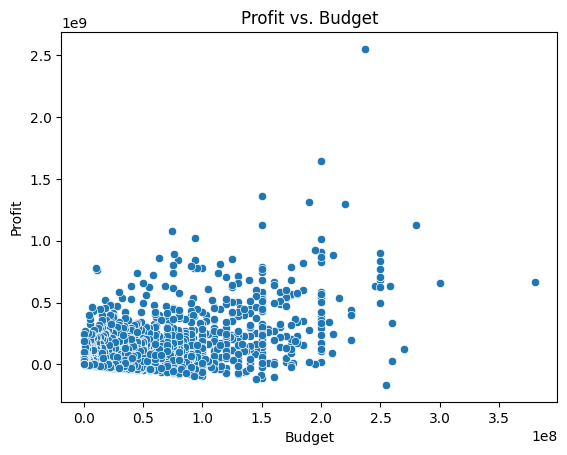

In [14]:
sns.scatterplot(x='budget', y='profit', data=movies_df)
plt.title('Profit vs. Budget')
plt.xlabel('Budget')
plt.ylabel('Profit')

This scatter plot reveals a positive correlation between a movie’s budget and its revenue, suggesting that higher production budgets generally increase the likelihood of higher earnings.

### Popularity Analysis

Movies were sorted by popularity to identify the most widely viewed and discussed films in the dataset.

In [15]:
popular_movies = movies_df.sort_values(by='popularity', ascending=False)
popular_movies.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year,profit
546,74000000,"['Family', 'Animation', 'Adventure', 'Comedy']",211672,875.581305,['United States of America'],2015-06-17,1156730962,91.0,['English'],Minions,6.4,4571,2015,1082730962
95,165000000,"['Adventure', 'Drama', 'Science Fiction']",157336,724.247784,"['Canada', 'United States of America', 'United...",2014-11-05,675120017,169.0,['English'],Interstellar,8.1,10867,2014,510120017
788,58000000,"['Action', 'Adventure', 'Comedy']",293660,514.569956,['United States of America'],2016-02-09,783112979,108.0,['English'],Deadpool,7.4,10995,2016,725112979
94,170000000,"['Action', 'Science Fiction', 'Adventure']",118340,481.098624,"['United Kingdom', 'United States of America']",2014-07-30,773328629,121.0,['English'],Guardians of the Galaxy,7.9,9742,2014,603328629
127,150000000,"['Action', 'Adventure', 'Science Fiction', 'Th...",76341,434.278564,"['Australia', 'United States of America']",2015-05-13,378858340,120.0,['English'],Mad Max: Fury Road,7.2,9427,2015,228858340


Text(0, 0.5, 'popularity')

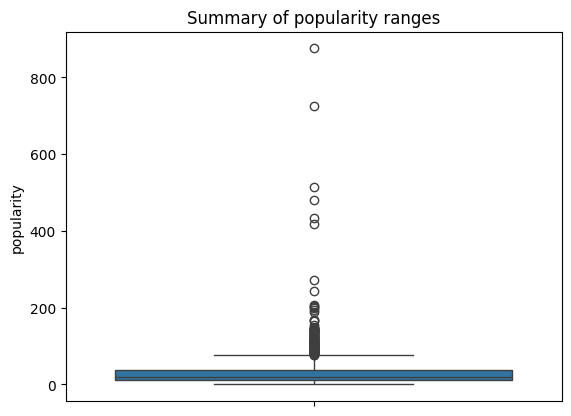

In [16]:
sns.boxplot(y='popularity', data=movies_df)
plt.title('Summary of popularity ranges')
plt.ylabel('popularity')

Most movies have low popularity scores, but there are notable outliers with extremely high popularity, reaching values close to 900.

Text(0, 0.5, 'Vote average')

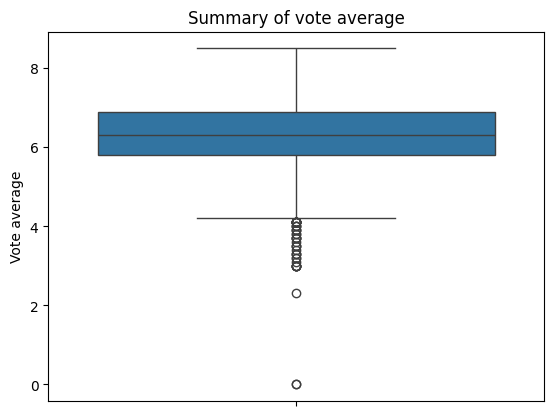

In [17]:
sns.boxplot(y='vote_average', data=movies_df)
plt.title('Summary of vote average')
plt.ylabel('Vote average')

The majority of vote averages fall between 6 and 7, with several lower-rated outliers extending down to ratings around 2.

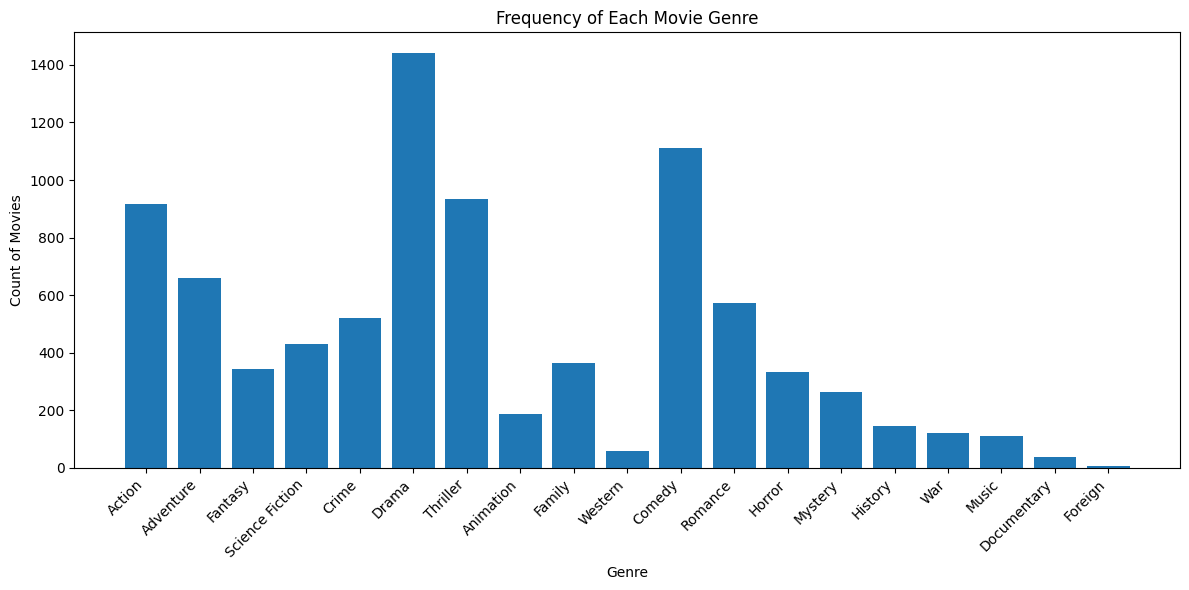

In [18]:
genres_list = []

for genres in movies_df['genres']:
    genres_list.append(genres)

genres_2dlist = [ast.literal_eval(string_list) for string_list in genres_list]

genres_dict = {}

for genres in genres_2dlist:
    for genre in genres:
        if genre in genres_dict:
            genres_dict[genre] += 1
        else:
            genres_dict[genre] = 1

plt.figure(figsize=(12, 6))
plt.bar(genres_dict.keys(), genres_dict.values())
plt.title('Frequency of Each Movie Genre')
plt.xlabel('Genre')
plt.ylabel('Count of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

This bar plot shows the distribution of movie genres in the dataset. Drama, Action, Thriller, and Comedy dominate, indicating that these genres are the most commonly produced and widely consumed.

Text(0.5, 1.0, 'Relationship between Budget and Revenue')

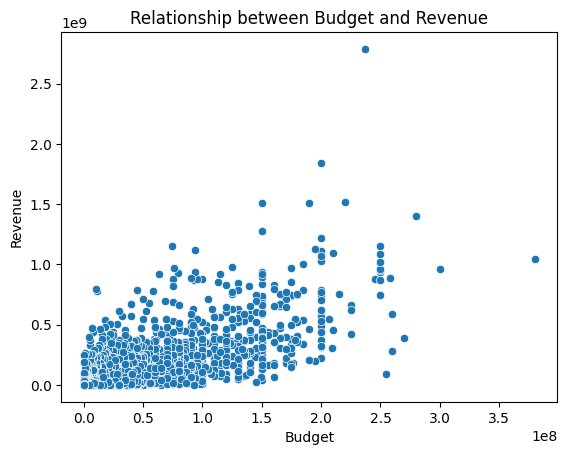

In [19]:
sns.scatterplot(x='budget', y='revenue', data=movies_df)
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Relationship between Budget and Revenue')

This plot shows a positive relationship between budget and profit, indicating that higher-budget movies tend to generate higher profits, although variability increases with budget size.

Text(0, 0.5, 'Count of movies')

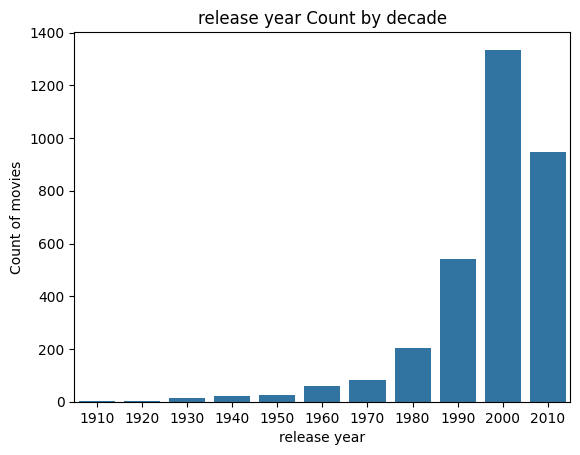

In [20]:
movies_df['decade'] = (movies_df['release_year'] // 10) * 10

sns.countplot(x='decade', data=movies_df)
plt.title('release year Count by decade')
plt.xlabel('release year')
plt.ylabel('Count of movies')

This visualization highlights a significant increase in movie production over time, with output more than doubling from the 1980s to the 1990s and increasing further into the 2000s.

Text(0, 0.5, 'Frequency')

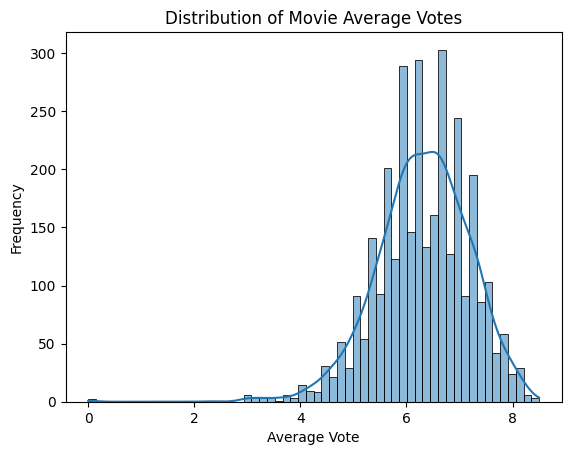

In [21]:
sns.histplot(x='vote_average', data=movies_df, kde=True)
plt.title('Distribution of Movie Average Votes')
plt.xlabel('Average Vote')
plt.ylabel('Frequency')

Most movies have ratings between 4 and 8, forming a roughly normal distribution, which suggests that extreme ratings are less common.